# Model to classify the skulls

In [10]:
#/home/adrian/Downloads/challenge.csv
import pandas as pd
import numpy as np
import csv
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
skulls = pd.read_csv('/media/sf_as/private/internal/challenge.csv')

In [27]:
skulls.head(5)

,response,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18
0,B,1312,1445,882,NaN,609,241,180,394,782,249,227,531,153,88,1086,131,179,591
1,B,1439,1503,985,230,629,222,150,416,824,233,248,632,141,100,1158,148,181,643
2,B,1378,1464,934,NaN,620,233,135,403,778,244,240,575,144,107,1131,116,169,610
3,B,1315,1367,895,230,564,207,158,394,801,224,242,568,116,79,1090,132,189,594
4,B,1413,1500,969,NaN,645,247,161,426,823,241,252,607,120,99,1175,131,197,654


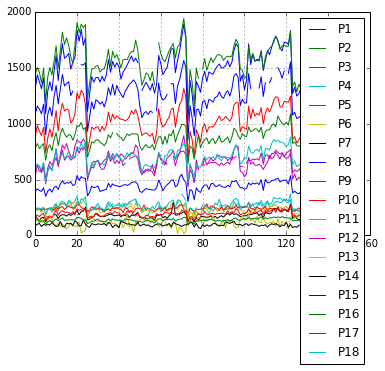

In [28]:
skulls.plot()

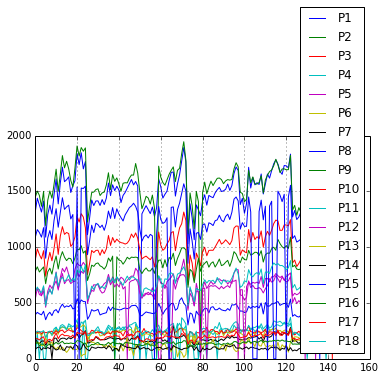

In [29]:
skulls0 = skulls.fillna(0)
skulls0.plot()

In [79]:
labels = {'A': 1,
            'B': 2,
            'C': 3,
            'D': 4}
def extract_features(obs):
    y = []
    X = np.ndarray(shape=(len(obs), len(obs.columns)-1))
    i = 0
    for ix in obs.index:
        row = obs.ix[ix]               
        X[i,:] = row[1:]
        y.append(labels[row[0]])
        i += 1
  
    return X, obs.columns, np.array(y)

In [80]:
X, feature_names, y = extract_features(skulls0)
print X[0:1,:]
print y[0:5]

[[ 1312.  1445.   882.     0.   609.   241.   180.   394.   782.   249.
    227.   531.   153.    88.  1086.   131.   179.   591.]]
[2 2 2 2 2]


In [81]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state=1)
classifier.fit_transform(X, y)
print feature_names1
print classifier.coef_

Index([u'response', u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7', u'P8', u'P9', u'P10', u'P11', u'P12', u'P13', u'P14', u'P15', u'P16', u'P17', u'P18'], dtype='object')
[[ -5.50614395e-03   1.61188723e-01  -3.70619901e-02   6.72449297e-02
   -3.85763835e-01   3.34958600e-01   3.12430992e-01  -3.24590769e-01
    1.79571148e-02  -5.37432947e-01   6.56217174e-02   1.25091041e-02
    2.52630297e-01  -2.74519783e-01   4.85680941e-03   3.68655241e-01
   -2.28515536e-01   1.51767068e-01]
 [  1.87523130e-03   2.28118778e-04  -2.18761539e-04   1.06939886e-03
    3.04636237e-02   7.90567429e-02  -1.25920689e-02  -4.47163582e-02
   -2.29679577e-05  -2.11838897e-02   3.35017246e-03   2.40430870e-03
    1.55514418e-02  -5.24375314e-03   1.03804056e-03  -1.80431602e-02
    1.71799892e-02  -3.14655247e-02]
 [ -2.01215119e-03  -4.47933352e-03   1.28450117e-03  -3.81144455e-03
    1.08623531e-02  -6.38489938e-02   7.69899917e-04   5.64952628e-02
   -8.61920053e-04   5.21025077e-02  -1.21383305e-02  

/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [82]:
X_test1 = np.array([1115, 0, 748, 182, 0, 0, 178, 311, 756, 226, 0, 0, 0, 48, 1009, 0, 204, 593])
y_pred = classifier.predict(X_test1)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [90]:
print labels.keys()[y_pred], y_pred

D [3]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  if __name__ == '__main__':


# validation

In [84]:
from sklearn.cross_validation import train_test_split
skulls_train, skulls_test = train_test_split(skulls0, test_size=0.2, random_state=1)

In [85]:
X_train, feature_names, y_train = extract_features(skulls_train)

In [86]:
_ = classifier.fit_transform(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [87]:
X_test, feature_names, y_test = extract_features(skulls_test)
classifier.score(X_test, y_test)

0.73333333333333328

# random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=1)

In [89]:
_ = rfc.fit_transform(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [75]:
rfc.score(X_test, y_test)

0.59999999999999998

The classifiers are not very accurate, this is probably because of the simplistic tratment of missing data with fillna(0).
There are many data attribution techniques that we may try:
 - Fill with the mean of the column (feature) - this is probably a goo starting point to improve accuracy
 - Remove the row (this is not adequate becaue we dont have too much data)


In [77]:
rfc.predict(X_test1)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([3])

In [91]:
print y

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
